In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
import datetime as dt
import time
import random

In [2]:
assets=pd.read_csv('assets_next_month.csv')
assets.drop(columns='Unnamed: 0',inplace=True)
assets

,month,asset_00,asset_01,asset_02,asset_03,asset_04,asset_10,asset_11,asset_12,asset_13,...,cum_asset_20,cum_asset_21,cum_asset_22,cum_asset_23,cum_asset_24,cum_asset_30,cum_asset_31,cum_asset_32,cum_asset_33,cum_asset_34
0,2008-11,0.181660,0.250744,0.168936,0.216017,0.208095,0.246086,0.185462,0.122670,0.136907,...,1.187693,1.143128,1.124231,1.093142,1.106251,1.140812,1.137553,1.168864,1.179914,1.051431
1,2008-12,0.015306,-0.021506,0.044986,-0.018529,-0.042193,0.002682,0.019621,0.013374,0.013188,...,1.255007,1.156492,1.153428,1.170492,1.071930,1.206881,1.169303,1.222932,1.211577,1.002340
2,2009-01,0.205497,0.209716,0.185721,0.165014,0.157118,0.221011,0.165971,0.173333,0.177359,...,1.589964,1.402169,1.362118,1.347553,1.148327,1.413605,1.339596,1.399890,1.322997,1.022150
3,2009-02,0.179261,0.077565,0.065527,0.093092,0.048649,0.103778,0.074794,0.051498,0.095088,...,1.731567,1.512780,1.422235,1.420805,1.161285,1.536123,1.490467,1.481169,1.444903,1.111692
4,2009-03,0.211800,0.196934,0.161593,0.190241,0.185991,0.204958,0.193098,0.210660,0.214519,...,2.092381,1.885112,1.875295,1.702801,1.346484,1.895819,1.839458,1.807552,1.715081,1.286964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2020-03,-0.047706,-0.047251,-0.033697,-0.050241,-0.040515,-0.045613,-0.092922,-0.046606,-0.055552,...,2.724411,2.023932,1.906985,2.811126,1.118572,3.320046,2.247278,2.188047,2.424749,1.304873
137,2020-04,0.011026,0.000064,0.009871,0.015799,0.008614,0.029184,0.004249,-0.004773,-0.008536,...,2.748227,2.099191,2.051142,3.125917,1.208343,3.578234,2.580283,2.374807,2.663788,1.422849
138,2020-05,-0.008110,-0.019444,-0.012854,-0.027738,-0.026574,-0.011865,-0.018813,-0.028644,-0.044458,...,2.847924,2.118088,1.999778,3.066523,1.188909,3.650332,2.709805,2.395629,2.697980,1.429503
139,2020-06,0.016290,0.015153,0.067928,0.006881,-0.004260,0.012225,0.046946,0.053931,0.051082,...,2.834540,2.256477,2.164010,3.497164,1.268163,4.094331,3.079416,2.758004,3.102644,1.695749


In [3]:
factors=pd.read_csv('factors_hs300.csv')
factors.drop(columns='Unnamed: 0',inplace=True)
factors

,month,country,beta,value,growth,momentum,size,leverage,earnings,liquidity,...,cum_utilities,cum_real_estate,hml,rmw,smb,umd,cum_hml,cum_rmw,cum_smb,cum_umd
0,2005-05,-0.084011,-0.016308,0.000516,-0.010810,-0.058812,-0.014709,0.001442,0.008021,-0.001592,...,0.969476,0.992112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-06,0.008757,-0.011878,-0.005379,-0.001064,0.014213,0.015391,-0.004848,-0.002003,0.005126,...,1.003450,1.001367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-07,-0.011751,-0.002583,0.002416,0.009663,0.011548,0.050924,-0.007994,0.004136,0.017468,...,1.016668,1.049670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-08,0.055754,0.034267,0.004633,0.009446,-0.027481,-0.017377,0.005495,-0.013354,-0.023230,...,1.030283,1.047703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005-09,-0.002458,-0.002978,-0.020718,0.016477,-0.009207,-0.022967,-0.000758,-0.000779,-0.010510,...,1.025623,1.081467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,2020-03,-0.065049,-0.026713,0.014088,-0.001401,0.006967,-0.012770,-0.008808,-0.005013,-0.010256,...,0.483421,1.845133,-0.016994,-0.011347,0.001368,-0.012419,0.726963,0.516401,0.772366,1.284576
179,2020-04,0.044611,-0.005549,-0.009801,0.016960,0.020920,0.001306,-0.003770,-0.005884,0.005191,...,0.478479,1.843362,0.045918,0.016647,0.014592,0.037295,0.760343,0.524997,0.783636,1.332485
180,2020-05,-0.011744,-0.007021,-0.005399,0.003368,0.004459,-0.005367,-0.000623,-0.012987,-0.000934,...,0.472235,1.822181,0.020355,0.003641,-0.011202,0.000517,0.775820,0.526909,0.774858,1.333173
181,2020-06,0.067942,0.041438,-0.000674,-0.001174,0.017271,0.008502,0.009416,-0.009755,-0.017208,...,0.477775,1.810516,0.055984,0.030677,0.021218,0.061009,0.819253,0.543073,0.791299,1.414508


In [4]:
factors.dropna(inplace=True)
factors=factors[['month', 'country', 'beta', 'value', 'growth', 'momentum', 'size',
       'leverage', 'earnings', 'liquidity', 'nlsize',
       'residualvolatility', 'dividend', 'rici', 'energy', 'materials',
       'industrials', 'consumer_discretionary', 'consumer_staples',
       'health_care', 'financials', 'information', 'telecom', 'utilities',
       'real_estate','hml', 'rmw', 'smb', 'umd']]
factors.index=range(len(factors))
factors

,month,country,beta,value,growth,momentum,size,leverage,earnings,liquidity,...,health_care,financials,information,telecom,utilities,real_estate,hml,rmw,smb,umd
0,2009-11,0.074335,0.018216,0.008792,0.003138,-0.006779,-0.013941,-0.005827,0.001534,0.002075,...,0.006725,-0.011391,-0.009134,-0.049888,-0.018794,-0.017180,-0.008605,0.007941,-0.027908,-0.006430
1,2009-12,0.019222,-0.001137,0.017839,0.000076,0.010920,-0.010314,-0.003529,0.006478,-0.011722,...,0.008004,0.018583,0.047902,0.005963,-0.052321,-0.101084,-0.016276,-0.019686,0.000451,-0.021071
2,2010-01,-0.102229,-0.034423,-0.005948,-0.012612,-0.009262,-0.025738,-0.001566,-0.003805,0.012110,...,0.074982,-0.015668,0.125597,0.092262,0.013307,-0.018920,-0.003925,0.000705,-0.036839,-0.050906
3,2010-02,0.023983,0.001044,0.001080,-0.003327,0.012002,-0.010379,0.004755,0.000994,-0.002212,...,0.001094,-0.000979,-0.020643,-0.041713,0.007361,0.026511,0.001441,0.003797,-0.017111,0.006356
4,2010-03,0.017394,0.005177,-0.010591,-0.003569,-0.006036,-0.007947,0.007786,0.005617,0.000716,...,-0.024625,0.013405,-0.002292,-0.044604,-0.023030,-0.004003,0.000435,-0.006427,0.001805,-0.006034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2020-03,-0.065049,-0.026713,0.014088,-0.001401,0.006967,-0.012770,-0.008808,-0.005013,-0.010256,...,0.048126,-0.002237,-0.075836,-0.008558,0.019955,0.005932,-0.016994,-0.011347,0.001368,-0.012419
125,2020-04,0.044611,-0.005549,-0.009801,0.016960,0.020920,0.001306,-0.003770,-0.005884,0.005191,...,0.031349,-0.011561,0.010372,0.016789,-0.010223,-0.000960,0.045918,0.016647,0.014592,0.037295
126,2020-05,-0.011744,-0.007021,-0.005399,0.003368,0.004459,-0.005367,-0.000623,-0.012987,-0.000934,...,0.026879,-0.009178,-0.027187,0.001783,-0.013050,-0.011490,0.020355,0.003641,-0.011202,0.000517
127,2020-06,0.067942,0.041438,-0.000674,-0.001174,0.017271,0.008502,0.009416,-0.009755,-0.017208,...,0.086246,-0.015920,0.060816,0.027306,0.011732,-0.006402,0.055984,0.030677,0.021218,0.061009


In [5]:
assets=assets[assets.columns.values[:21]]
cond=(assets.month>=factors.month.values[0])&(assets.month<=factors.month.values[-1])
assets=assets.loc[cond]
assets.index=range(len(assets))
assets

,month,asset_00,asset_01,asset_02,asset_03,asset_04,asset_10,asset_11,asset_12,asset_13,...,asset_20,asset_21,asset_22,asset_23,asset_24,asset_30,asset_31,asset_32,asset_33,asset_34
0,2009-11,0.141270,0.123260,0.110268,0.096692,0.066237,0.176743,0.074776,0.128745,0.082241,...,0.116356,0.096963,0.120414,0.119428,0.043437,0.143041,0.061249,0.072133,0.090302,0.096851
1,2009-12,-0.007259,0.015453,0.032867,0.003077,0.065279,0.035359,0.026349,-0.012163,-0.007660,...,0.053209,0.005436,-0.016932,-0.011397,0.009621,-0.030466,-0.011867,-0.011214,0.000187,-0.011649
2,2010-01,-0.065163,-0.058375,-0.070529,-0.081119,-0.117655,0.007130,-0.031905,-0.046588,-0.125372,...,-0.039982,-0.064525,-0.044611,-0.092145,-0.106117,-0.034925,-0.051356,-0.132879,-0.087589,-0.139594
3,2010-02,0.042621,0.053472,0.030423,0.019876,0.016084,0.036041,0.049130,0.046202,0.026256,...,0.060516,0.048691,0.027310,0.023281,0.025827,0.085946,0.022519,0.039325,0.034696,0.023157
4,2010-03,0.010107,-0.009316,0.012311,0.030624,-0.002164,0.022633,0.014050,0.002638,-0.000311,...,0.028189,-0.026582,0.013125,0.014537,0.036955,0.026660,0.011846,0.025452,-0.017973,0.006016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2020-03,-0.047706,-0.047251,-0.033697,-0.050241,-0.040515,-0.045613,-0.092922,-0.046606,-0.055552,...,-0.102509,-0.067748,-0.066968,-0.082667,-0.094524,-0.073943,-0.104435,-0.079827,-0.053296,-0.048597
125,2020-04,0.011026,0.000064,0.009871,0.015799,0.008614,0.029184,0.004249,-0.004773,-0.008536,...,0.008742,0.037185,0.075594,0.111980,0.080255,0.077766,0.148181,0.085355,0.098583,0.090412
126,2020-05,-0.008110,-0.019444,-0.012854,-0.027738,-0.026574,-0.011865,-0.018813,-0.028644,-0.044458,...,0.036277,0.009002,-0.025042,-0.019001,-0.016083,0.020149,0.050197,0.008768,0.012836,0.004677
127,2020-06,0.016290,0.015153,0.067928,0.006881,-0.004260,0.012225,0.046946,0.053931,0.051082,...,-0.004699,0.065337,0.082125,0.140433,0.066661,0.121633,0.136398,0.151265,0.149988,0.186250


In [6]:
#为了方便整除，去掉最后一个月，变为128个月
factors=factors.iloc[:-1]
assets=assets.iloc[:-1]

In [8]:
#需要用到的外部变量有assets、factors
def test(asset,used_fcts):#这两个变量是str和装有str的np.arr
    
    params=[]
    tvalues=[]
    pvalues=[]
    std_err=[]
    conf_l=[]
    conf_r=[]
    
    y=assets[asset].values
    X=factors[used_fcts].values
    X = sm.add_constant(X)
    model = sm.OLS(y,X).fit()
    for i in range(len(model.params)):
        params.append(model.params[i].round(5))
        tvalues.append(abs(model.tvalues[i].round(5)))
        pvalues.append(model.pvalues[i].round(5))
        std_err.append(model.bse[i])
        conf_l.append(model.conf_int()[i][0])
        conf_r.append(model.conf_int()[i][1])
    used_fcts.insert(0,'intercept')
#     print(used_fcts)
#     print(model.summary())
    rlt_df=pd.DataFrame({'factors':used_fcts,'params':params,'tvalues':tvalues,'pvalues':pvalues,\
                         'std_err':std_err,'left_conf':conf_l,'right_conf':conf_r})
    rlt_df['symbols']=asset
    rlt_df['adj_Rsq']=model.rsquared_adj.round(5)

    return rlt_df

In [ ]:
#经过以上处理所有因子和资产组合的回测时间段变为一致，均为2009-10～2020-07这130个月

In [ ]:
#single_factor_model_test------------------------------------------

In [9]:
#先计算出无因子时截距收益率的绝对值的平均值做为基准
ass_med=np.percentile(assets.describe().iloc[1].abs(),(50))
ass_mean=assets.describe().iloc[1].abs().mean()
print(ass_med,ass_mean)

0.00534147459965967 0.0048415377111284096


In [11]:
#用每个单因子去回归20个资产，得到相应的截面解释力：截距绝对值中位数(平均数)；时序解释力：Rsq中位数(平均数)
inc_med=[]
inc_mean=[]
Rsq_med=[]
Rsq_mean=[]
fct=[]
for col in factors.columns.values[1:]:
    for asset in assets.columns.values[1:]:
        df=test(asset,[col])
        if asset==assets.columns.values[1]:
            rlt=df.copy()
        else:
            rlt=pd.concat([df,rlt],axis=0)
    rlt.index=np.asarray(range(len(rlt)))
    inc_med.append((np.percentile(rlt.loc[rlt.factors=='intercept'].params.abs(),(50,))[0]-ass_med)/ass_med)
    inc_mean.append((rlt.loc[rlt.factors=='intercept'].params.abs().mean()-ass_mean)/ass_mean)
    Rsq_med.append(np.percentile(rlt.loc[rlt.factors=='intercept'].adj_Rsq,(50,))[0])
    Rsq_mean.append(rlt.loc[rlt.factors=='intercept'].adj_Rsq.mean())
    fct.append(col)

In [12]:
pd.DataFrame({'used_fcts':fct,'median_inc':inc_med,'median_Rsq':Rsq_med,'mean_inc':inc_mean,'mean_Rsq':Rsq_mean}).sort_values('median_Rsq',ascending=False) 

,used_fcts,median_inc,median_Rsq,mean_inc,mean_Rsq
0,country,-0.182810,0.792900,-0.209445,0.770946
1,beta,0.110180,0.321645,0.188465,0.274276
8,liquidity,0.769174,0.123850,0.949381,0.121920
21,telecom,0.188810,0.118215,0.320655,0.109508
4,momentum,1.216616,0.113565,1.552495,0.117042
18,health_care,0.221573,0.072280,0.470917,0.061929
25,rmw,0.222509,0.052025,0.245059,0.074572
24,hml,0.028742,0.051680,0.012282,0.089564
26,smb,-0.009637,0.051580,-0.005068,0.085787
9,nlsize,0.083970,0.034120,0.115451,0.034055


In [23]:
single_test_rlt=pd.DataFrame({'used_fcts':factors.columns.values[1:],'median_inc':inc_med,'median_Rsq':\
                              Rsq_med,'mean_inc':inc_mean,'mean_Rsq':Rsq_mean\
                             }).sort_values('median_Rsq',ascending=False) 

In [25]:
single_test_rlt.to_csv('single_test.csv')

In [ ]:
#multi_factors_model_test------------------------------------------

In [13]:
#test_fama------------------------------------------------
#fama5因子模型对20个资产分别回归，得到的6个系数及其T、P，以及模型对该资产的总体解释力R，故共6x20=120params以及20个R
for asset in assets.columns.values[1:]:
    df=test(asset,['country','hml', 'rmw', 'smb', 'umd'])
    if asset==assets.columns.values[1]:
        rlt=df.copy()
    else:
        rlt=pd.concat([df,rlt],axis=0)
rlt.index=np.asarray(range(len(rlt)))
fama=rlt
fama

,factors,params,tvalues,pvalues,std_err,left_conf,right_conf,symbols,adj_Rsq
0,intercept,0.00305,1.15085,0.25204,0.002648,-0.002195,0.008290,asset_34,0.85624
1,country,0.92026,25.05676,0.00000,0.036727,0.847557,0.992967,asset_34,0.85624
2,hml,1.28703,8.49681,0.00000,0.151472,0.987177,1.586886,asset_34,0.85624
3,rmw,-0.11721,0.52223,0.60246,0.224449,-0.561533,0.327105,asset_34,0.85624
4,smb,0.60634,2.63975,0.00938,0.229698,0.151635,1.061053,asset_34,0.85624
...,...,...,...,...,...,...,...,...,...
115,country,0.99753,30.17168,0.00000,0.033062,0.932077,1.062975,asset_00,0.90341
116,hml,-1.10940,8.13614,0.00000,0.136355,-1.379331,-0.839475,asset_00,0.90341
117,rmw,0.32015,1.58455,0.11566,0.202048,-0.079820,0.720130,asset_00,0.90341
118,smb,-1.14862,5.55499,0.00000,0.206773,-1.557953,-0.739296,asset_00,0.90341


In [20]:
fama.to_csv('fama_multi_test.csv')

In [14]:
#统计fama5因子模型中各个因子在模型中起到的作用，即各个因子t>2在被测样本中的比例
avrg=[]
percent=[]
for fct in ['country','hml', 'rmw', 'smb', 'umd']:
    avrg.append(fama.loc[fama.factors==fct].tvalues.mean().round(2))
    percent.append(round((len(fama.loc[(fama.factors==fct)&(fama.tvalues>=2.)])/20*100),1))#20为资产或个股等样本数
fama_rlt=pd.DataFrame({'avrg':avrg,'percent':percent},index=['country','hml', 'rmw', 'smb', 'umd'])
fama_rlt.sort_values('percent',ascending=False)

,avrg,percent
country,32.81,100.0
hml,5.15,80.0
smb,4.23,75.0
rmw,1.26,20.0
umd,1.37,15.0


<AxesSubplot:>

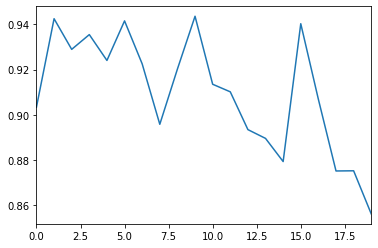

In [15]:
#20个R值
fama.groupby('symbols',as_index=False)['adj_Rsq'].mean()['adj_Rsq'].plot()

In [ ]:
#test_barra------------------------------------------------

In [16]:
for asset in assets.columns.values[1:]:
    df=test(asset,['country', 'beta', 'value', 'growth', 'momentum', 'size',
       'leverage', 'earnings', 'liquidity', 'nlsize',
       'residualvolatility', 'dividend', 'rici', 'energy', 'materials',
       'industrials', 'consumer_discretionary', 'consumer_staples',
       'health_care', 'financials', 'information', 'telecom', 'utilities',
       'real_estate'])
    if asset==assets.columns.values[1]:
        rlt=df.copy()
    else:
        rlt=pd.concat([df,rlt],axis=0)
rlt.index=np.asarray(range(len(rlt)))
barra=rlt
barra

,factors,params,tvalues,pvalues,std_err,left_conf,right_conf,symbols,adj_Rsq
0,intercept,-0.00390,1.44124,0.15255,0.002705,-0.009264,0.001466,asset_34,0.89783
1,country,0.98638,17.08078,0.00000,0.057748,0.871851,1.100911,asset_34,0.89783
2,beta,0.26088,1.42717,0.15656,0.182794,-0.101651,0.623406,asset_34,0.89783
3,value,-1.61794,8.03322,0.00000,0.201406,-2.017379,-1.218497,asset_34,0.89783
4,growth,0.56233,1.81105,0.07305,0.310502,-0.053474,1.178142,asset_34,0.89783
...,...,...,...,...,...,...,...,...,...
495,financials,-0.52150,1.53464,0.12794,0.339817,-1.195443,0.152452,asset_00,0.90557
496,information,0.03983,0.50339,0.61577,0.079133,-0.117107,0.196776,asset_00,0.90557
497,telecom,-0.09283,1.36272,0.17594,0.068119,-0.227925,0.042270,asset_00,0.90557
498,utilities,-0.17895,2.13618,0.03503,0.083770,-0.345087,-0.012810,asset_00,0.90557


In [27]:
barra.to_csv('barra_multi_test.csv')

In [17]:
avrg=[]
percent=[]
for fct in ['country', 'beta', 'value', 'growth', 'momentum', 'size',
       'leverage', 'earnings', 'liquidity', 'nlsize',
       'residualvolatility', 'dividend', 'rici', 'energy', 'materials',
       'industrials', 'consumer_discretionary', 'consumer_staples',
       'health_care', 'financials', 'information', 'telecom', 'utilities',
       'real_estate']:
    avrg.append(barra.loc[barra.factors==fct].tvalues.mean().round(2))
    percent.append(round((len(barra.loc[(barra.factors==fct)&(barra.tvalues>=2.)])/20*100),1))
barra_rlt=pd.DataFrame({'avrg':avrg,'percent':percent},index=['country', 'beta', 'value', 'growth', 'momentum', 'size',
       'leverage', 'earnings', 'liquidity', 'nlsize',
       'residualvolatility', 'dividend', 'rici', 'energy', 'materials',
       'industrials', 'consumer_discretionary', 'consumer_staples',
       'health_care', 'financials', 'information', 'telecom', 'utilities',
       'real_estate'])
barra_rlt.sort_values('percent',ascending=False)

,avrg,percent
country,17.59,100.0
size,5.25,90.0
value,4.30,80.0
leverage,3.28,75.0
nlsize,2.75,70.0
industrials,2.42,60.0
financials,2.33,55.0
earnings,3.14,50.0
momentum,2.31,40.0
utilities,1.94,35.0


<AxesSubplot:>

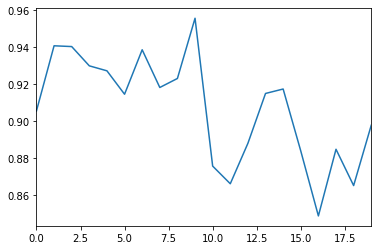

In [18]:
barra.groupby('symbols',as_index=False)['adj_Rsq'].mean()['adj_Rsq'].plot()

In [ ]:
#结论：
#十年来沪深300样本空间中，无论是fama还是barra，给出了完全一致的结果，显然只有市场、价值、规模这三个因子是起主导作用的